## Latar Belakang 

Sebuah perusahaan shipping memiliki tingkat ketidaktepatan waktu barang sampai kepada customer yang tinggi dan karena itu hal ini berdampak pada penilaian dari customer atas layanan pengiriman yang diberikan oleh perusahaan.



Permasalahannya adalah : banyak barang yang tidak reach on time bagaimana cara memaksimalkan reach on timenya . 

## Pernyataan Masalah

Perusahaan ingin mengetahui bagaimana caranya agar mayoritas barang yang sampai tepat pada waktunya meningkat dibandingkan sebelumnya dan melampaui tingkat ketidaktepatan barang yang sampai kepada customer. Perusahaan juga ingin mengetahui rating dari customer atas layanan yang diberikan. Hal ini bisa dilihat dari metode pengiriman yang digunakan, berat barang yang dibeli oleh customer, lokasi gudang yang digunakan sebagai titik awal dari pengiriman, dan berbagai faktor lainnya. 

Sebagai seorang **data analyst**, kita akan mencoba menjawab pertanyaan berikut:

Bagaimana caranya agar perusahaan dapat meningkatkan ketepatan waktu pengiriman dari berbagai faktor yang ada? dan apakah customer rating dipengaruhi oleh ketepatan waktu produk (Reach on Time)?

In [102]:
pip install plotly

In [103]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import scipy.stats as stats 
from scipy.stats import chi2_contingency



In [104]:
df = pd.read_csv('Online Retail Shipping.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


Dataset Online Retail Shipping memiliki 12 kolom sebagai berikut:
- ID : nomor ID yang unique untuk tiap customer
- Warehouse block : Perusahaan shipping ini memiliki warehouse yang besar dan dibagi menjadi 5 blok yaitu A,B,C,D,F
- Mode of shipment: Perusahaan melakukan pengiriman dengan tiga cara yaitu metode darat(Road), laut (Ship) dan udara(Flight).
- Customer care calls: Jumlah customer mengubungi call center berkaitan dengan pengiriman
- Customer rating: Penilaian dari customer dengan rating terendah 1 dan rating tertinggi 5 
- Cost of the product: Harga barang ini dalam US dollars. 
- Prior purchases: Merupakan jumlah pembelian sebelumnya yang dilakukan oleh customer
- Product importance: Tingkat kepentingan produk yang dikategorikan sebagai low, medium dan high. 
- Gender : terdiri dari male dan female
- Discount offered: Diskon yang diberikan oleh perusahaan untuk pembelian produk yang dilakukan oleh customer. 
- Weight in gms: berat barang dalam gram yang dibeli oleh customer.
- Reach on time: Angka 1 menandakan barang tidak sampai tepat waktu dan angka 0 menandakan barang sampai tepat waktu. 


# Data Understanding

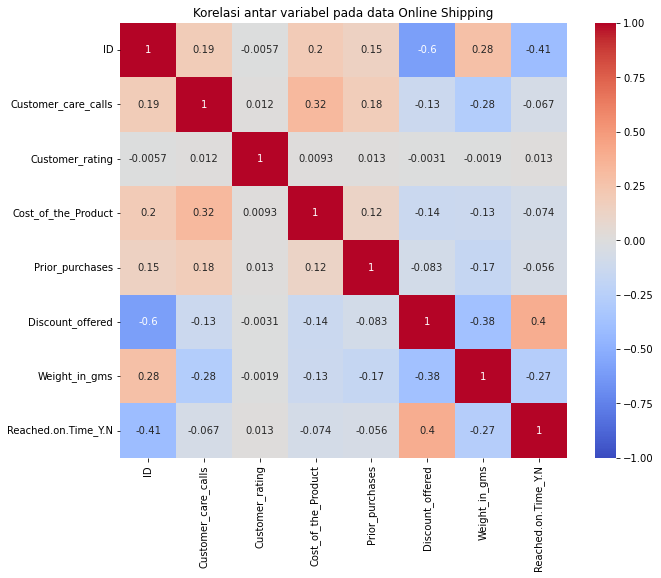

In [105]:
import matplotlib.pyplot as plt
# menghitung korelasi antar variabe;
korelasi_antar_variabel = df.corr()

# range untuk nilai minimum dan maksimum untuk korelasi
nilai_min = -1  # Minimum correlation value
nilai_max = 1   # Maximum correlation value

#Untuk menampilkan matriks korelasi 
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi_antar_variabel, annot=True, cmap='coolwarm', vmin=nilai_min, vmax=nilai_max)

plt.title('Korelasi antar variabel pada data Online Shipping')
plt.show()

Konklusi dari matriks korelasi:

- Customer ID memiliki korelasi negatif yang kuat dengan diskon yang diberikan(discount offered) yaitu sebesar -0.6
- Customer care calls memiliki korelasi positif yang moderat dengan biaya produk (Cost of Product) sebesar 0.32
- Discount offered memiliki relasi negatif yang moderat dengan Weight in grams sebesar 0.38.


**Customer ID ini tidak akan dipergunakan dalam visualisasi ataupun peninjauan karena ini menunjukkan ID customer dimana semakin besar ID customer bukan berarti discount semakin tinggi**
**sedangkan untuk discount offered dan weight in grams akan ditinjau apakah masing-masing variabel mempengaruhi reach on time**


In [106]:
#Lihat dahulu nama kolomnya apa aja 
for i in df.columns:
    print(i)

ID
Warehouse_block
Mode_of_Shipment
Customer_care_calls
Customer_rating
Cost_of_the_Product
Prior_purchases
Product_importance
Gender
Discount_offered
Weight_in_gms
Reached.on.Time_Y.N


- kode diatas berfungsi untuk menampilkan kolom-kolom yang menjadi feature dan juga target pada data. Target yang difokuskan dan ingin dianalisa dalam data ini adalah Reach on time yang berkaitan dengan ketepatan waktu produk sampai kepada customer. 

## Data cleaning 

In [107]:
# checking for null values 
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

- Tidak terdapat kolom yang mengandung null values pada data 


In [108]:
df.duplicated().sum()

0

- tidak terdapat baris yang mengandung duplikat pada data 

**mengecek apakah terdapat outlier pada data numerikal**

In [109]:
# Mengelompokkan variabel yang numerikal kedalam sebuah kolom

kolom_numerikal = df.select_dtypes(include = ['int64'])
kolom_numerikal.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


**Mencari outlier pada data**

In [110]:
# Menghitung Z-score untuk kolom numerikal
z_scores = kolom_numerikal.apply(stats.zscore)

# Threshold yang digunakan adalah 3 
threshold = 3

# Menentukan outlier dimana nilai absolut dari z_score > 3
outliers = kolom_numerikal[abs(z_scores) > threshold]

# Membuat dataframe
outliers_df = pd.DataFrame(outliers, columns=kolom_numerikal.columns)
outliers_df

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
10994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Bedasarkan hasil z-score tidak terdapat outlier pada kolom numerikal yaitu Cost of product dan Discount offered

Dapat disimpulkan bahwa data telah bersih tidak terdapat missing values, duplikat maupun outlier dan kita dapat lanjut ke tahapan selanjutnya yaitu Data Analysis

## Data Analysis



In [111]:
# Melihat deskriptif statistik dari fitur-fitur yang ada
df.describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.97])

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
95%,10449.10000,6.000000,5.000000,279.000000,6.000000,54.000000,5807.000000,1.000000
97%,10669.06000,6.000000,5.000000,287.000000,7.000000,59.000000,5884.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


- Customer care call memiliki range nilai 1 hingga 7 
- Customer rating memiliki range nilai 1 hingga 5 
- Cost of the product memiliki range nilai 96 dollar hingga 310 dollar
- Discount offered memiliki range nilai 1 dollar hingga 65 dollar
- Weight in Grams memiliki range nilai 1001 grams hingga 7846 grams 

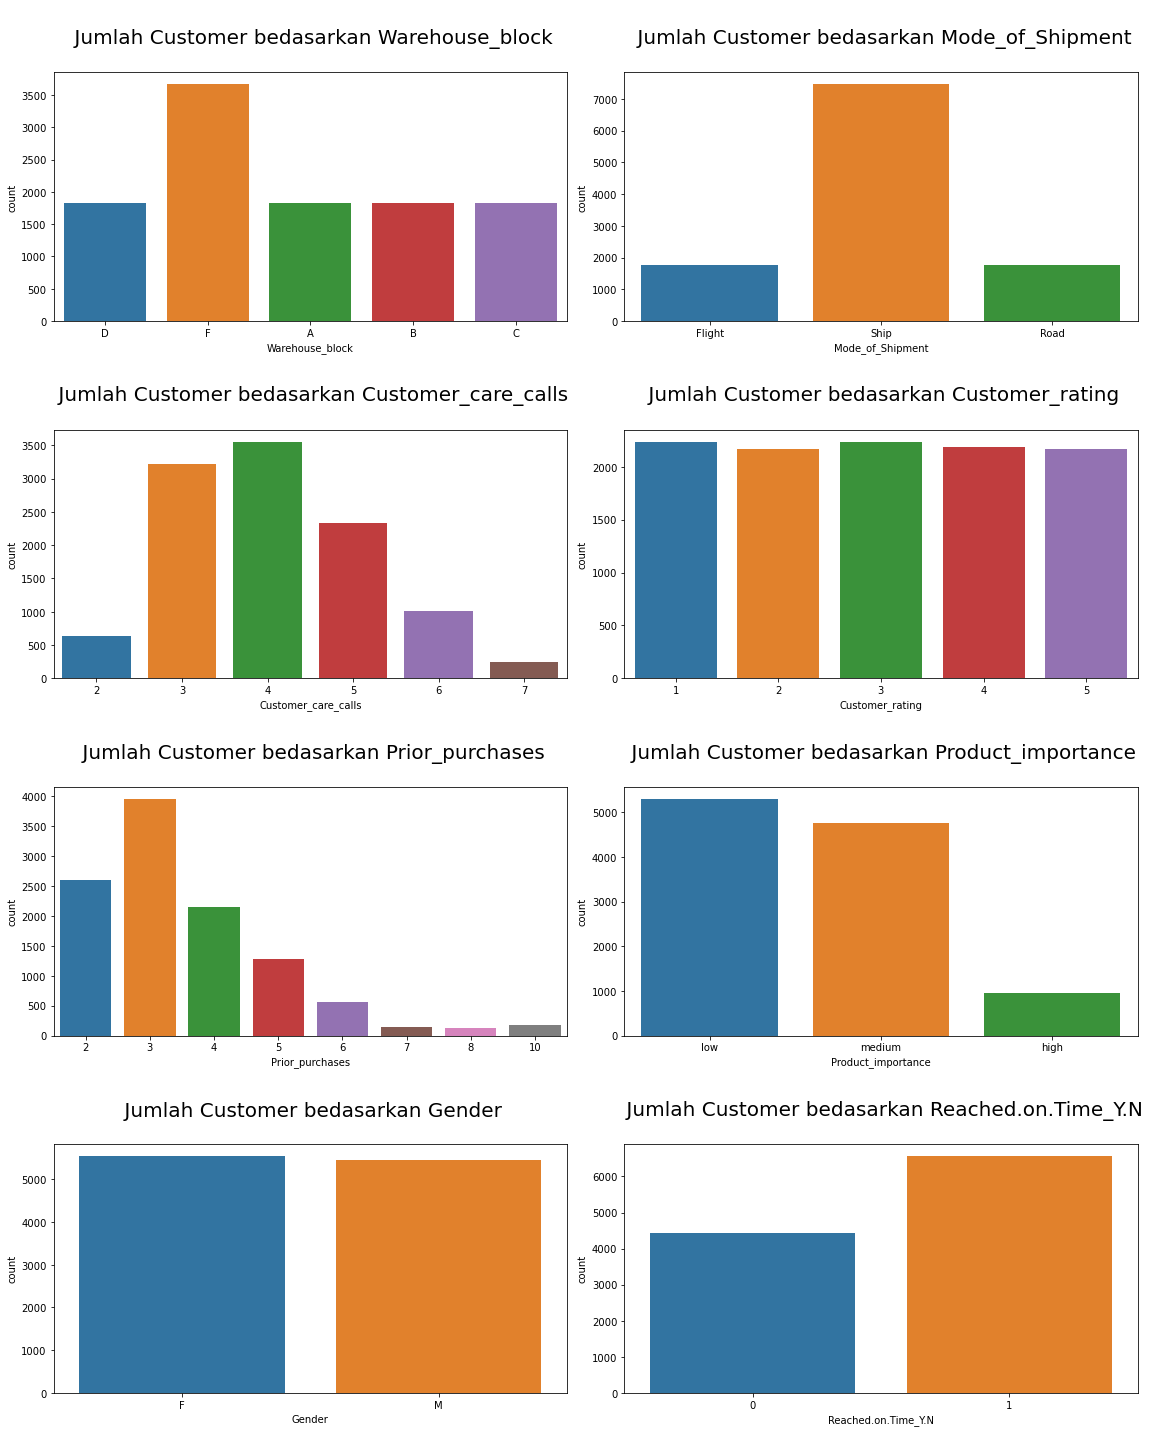

In [112]:
# Menghitung value counts dari setiap variabel yang kategorikal
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
jumlah_plot = 1

# Plot untuk setiap kolom kategorikal dengan for loop
for i in range(len(cols)):
    if jumlah_plot <= 8:
        ax = plt.subplot(4, 2, jumlah_plot)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n Jumlah Customer bedasarkan {cols[i]}\n", fontsize = 20)
        
    jumlah_plot += 1

plt.tight_layout()
plt.show()

- Bedasarkan plot warehouse, Warehouse Block F memiliki jumlah terbanyak dibandingkan dengan warehouse lainnya 
- Bedasarkan shipment method, Ship paling banyak digunakan untuk mengirimkan barang kepada customer 
- Bedasarkan plot customer calls, Mayoritas customer menghubungi call center sebanyak 4 kali. 
- Customer rating dari rating paling rendah yaitu 1 hingga rating paling tinggi yaitu 5 tidak memiliki perbedaan yang signifikan 
- Kebanyakan customer sudah melakukan pembelian sebanyak 3 kali 
- Shipping company ini paling banyak memiliki barang dengan kategori low 
- Tidak terdapat perbedaan customer gender yang signifikan antara male dan female 
- Kebanyakan produk tidak sampai tepat waktu kepada customer 


In [113]:
# Perhitungan proporsi untuk setiap warehouse block
proportions = df.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).size().groupby(level=0).apply(lambda x: x / x.sum()).reset_index(name='Proportion')

# Membuat bar plot dengan proporsi
fig = px.bar(proportions, x='Warehouse_block', y='Proportion', color='Reached.on.Time_Y.N')

fig.update_layout(
    title='Proportion of Reach On Time by Warehouse Block',
    xaxis=dict(title='Warehouse Block'),
    yaxis=dict(title='Proportion'),
    legend_title='Reached On Time'
)

fig.show()

- Bedasarkan grafik diatas pengiriman melalui warehouse block F memang paling banyak namun hal ini tidak mempengaruhi ketepatan waktu produk sampai kepada customer.<br>
- Proporsi untuk kelima warehouse yaitu A, B, C, D dan F tidak memiliki perbedaan nilai yang signifikan untuk persentase barang yang sampai tepat waktu berkisar diantara nilai 39%-41% nilai ini ditunjukkan oleh grafik yang berwarna biru. 


Akan dilakukan chi square test untuk membuktikan bahwa setiap warehouse block memiliki proporsi yang sama untuk reach on time

In [114]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])

# Melakukan uji chi-square
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menentukan H0 dan H1
alpha = 0.05  # Tingkat signifikansi
if p_val < alpha:
    print("Terdapat hubungan yang signifikan antara Warehouse block dan Reached on Time")
else:
    print("Tidak terdapat hubungan yang signifikan antara Warehouse block dan Reached on Time")

Chi-square statistic: 1.0893868307263042
p-value: 0.8959524278243698
Tidak terdapat hubungan yang signifikan antara Warehouse block dan Reached on Time


- Bedasarkan hasil test chi-square dengan p-value = 0.8959524278243698 > 0.05 maka dapat disimpulkan bahwa warehouse block tidak memiliki hubungan dengan Reach on Time

## Gender

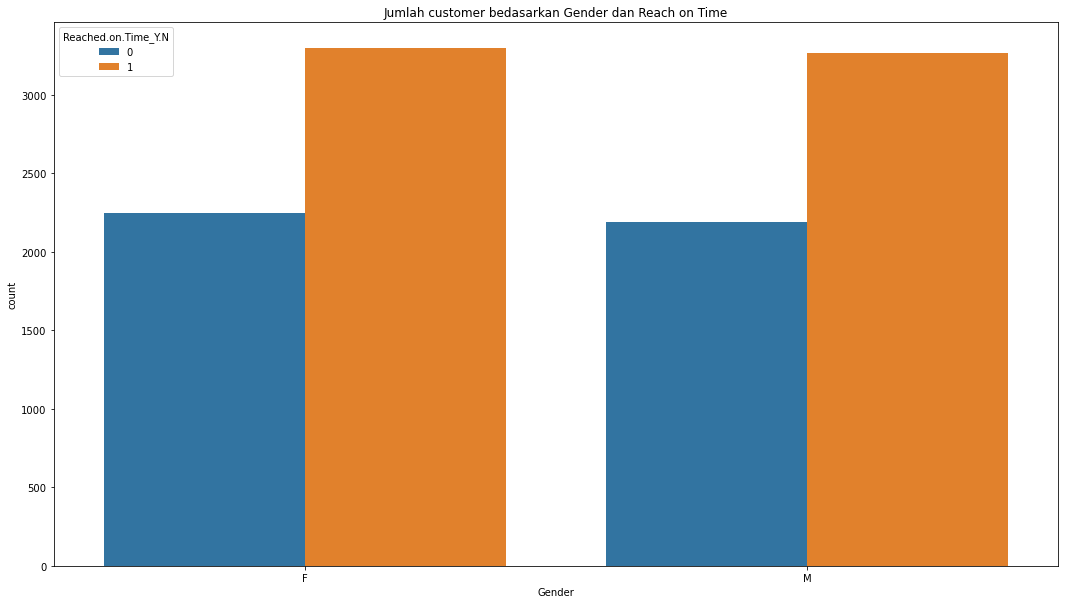

In [115]:
#countplot dari gender dengan hue reach on time 

plt.figure(figsize=(18, 10))
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N', data=df)

plt.title('Jumlah customer bedasarkan Gender dan Reach on Time')
plt.show()

- bedasarkan grafik gender yang ditampilkan akan dibuktikan bahwa tidak terdapat hubungan antara gender dengan ketepatan waktu sampai kepada customer dari gender male maupun female. 
- Total dari gender male dan female sebanyak 5544 dan 5545 customer.
- Jumlah customer dengan gender male dan female tidak berbeda signifikan untuk kedua kategori. Customer dengan gender female yang menerima produk telat sebanyak 2249 dan customer dengan gender male sebanyak 2187 atau dalam persentase sebesar 40%. 

In [116]:

proportions = df.groupby(['Gender', 'Reached.on.Time_Y.N']).size().groupby(level=0).apply(lambda x: x / x.sum()).reset_index(name='Proportion')

fig = px.histogram(proportions, x='Gender', color='Reached.on.Time_Y.N', y='Proportion')

fig.update_layout(
    title='Proporsi Customer bedasarkan Gender dan Reach on Time',
    xaxis=dict(title='Gender'),
    yaxis=dict(title='Proportion'),
    legend_title='Reached On Time'
)

fig.show()

- Untuk mengetahui apakah terdapat hubungan antara gender dengan reach on time kita akan menggunakan **chi square test**

In [117]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])

# Melakukan uji chi-square
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menentukan H0 dan H1
alpha = 0.05  # Tingkat signifikansi
if p_val < alpha:
    print("Terdapat hubungan yang signifikan antara Gender dan Reached on Time")
else:
    print("Tidak terdapat hubungan yang signifikan antara Gender dan Reached on Time")

Chi-square statistic: 0.22307980845395214
p-value: 0.6367032124181522
Tidak terdapat hubungan yang signifikan antara Gender dan Reached on Time


- Bedasarkan hasil p-value = 0.6367032124181522 > 0.05. Maka dapat disimpulkan bahwa tidak terdapat hubungan antara gender dengan reach on time. 

## Mode of shipment

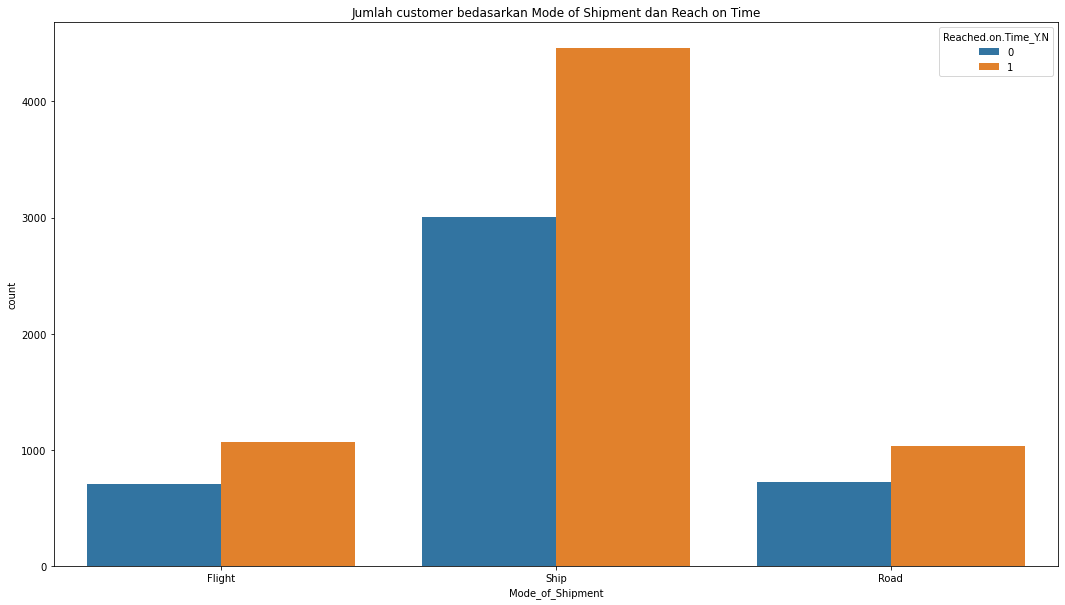

In [118]:
# Membuat countplot untuk membandingkan metode pengiriman dan pengaruhnya terhadap ketepatan waktu pengiriman.

plt.figure(figsize = (18, 10))
sns.countplot(data=df, x='Mode_of_Shipment', hue = 'Reached.on.Time_Y.N')

plt.title('Jumlah customer bedasarkan Mode of Shipment dan Reach on Time')
plt.show()



Visualisasi diatas menunjukkan metode pengiriman untuk produk yang terdiri dari tiga metode yaitu : 
- Flight (metode udara)
- Ship (metode laut)
- Road (metode darat) <br>
Metode pengiriman melalui ship paling banyak dibandingkan dengan kedua metode pengiriman lainnya 

In [119]:
# Perhitungan proporsi untuk setiap warehouse block
proportions = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().groupby(level=0).apply(lambda x: x / x.sum()).reset_index(name='Proportion')

# Membuat bar plot dengan proporsi
fig = px.bar(proportions, x='Mode_of_Shipment', y='Proportion', color='Reached.on.Time_Y.N')

fig.update_layout(
    title='Proporsi dari Reach On Time bedasarkan Mode of Shipment',
    xaxis=dict(title='Mode of Shipment'),
    yaxis=dict(title='Proportion'),
    legend_title='Reached On Time'
)

fig.show()

- Bedasarkan grafik yang ditampilkan , proporsi untuk ketiga metode shipment tidak berbeda signifikan dengan rentang persentase jumlah produk yang sampai tepat waktu kepada customer sebesar 39%-41%. 

Akan dilakukan uji chi-square untuk membuktikan bahwa proporsi Reach on time ketiga metode shipment tidak berbeda signifikan

In [120]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])

# Melakukan uji chi-square
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menentukan H0 dan H1
alpha = 0.05  # Tingkat signifikansi
if p_val < alpha:
    print("Terdapat hubungan yang signifikan antara Mode of Shipment dan Reached on Time")
else:
    print("Tidak terdapat hubungan yang signifikan antara Mode of Shipment dan Reached on Time")

Chi-square statistic: 0.7434357246718558
p-value: 0.6895487627593786
Tidak terdapat hubungan yang signifikan antara Mode of Shipment dan Reached on Time


Bedasarkan nilai p-value = 0.6895487627593786 > 0.05. Maka dapat disimpulkan bahwa tidak terdapat hubungan yang signifikan antara Mode of Shipment dengan Reach on Time. 

## Product importance

In [121]:
# Perhitungan proporsi untuk setiap product importance
proportions = df.groupby(['Product_importance', 'Reached.on.Time_Y.N']).size().groupby(level=0).apply(lambda x: x / x.sum()).reset_index(name='Proportion')

# Membuat bar plot dengan proporsi
fig = px.bar(proportions, x='Product_importance', y='Proportion', color='Reached.on.Time_Y.N')

fig.update_layout(
    title='Proporsi customer bedasarkan Product Importance dan Reach on Time',
    xaxis=dict(title='Product Importance'),
    yaxis=dict(title='Proportion'),
    legend_title='Reached On Time'
)

fig.show()

- Tidak terdapat perbedaan yang signifikan antara tingkat kepentingan produk low dan medium dengan ketepatan waktu produk sampai kepada customer. Namun tingkat kepentingan barang dengan kategori hugh memiliki proporsi reach on time yang paling rendah dibandingkan kedua kategori lainnya. Proporsi produk dengan tingkat kepentingan tinggi yang sampai tepat waktu hanya 35%. Alhasil, persentase ketelatan untuk produk dengan tingkat kepentingan tinggi ini paling tinggi dibandingkan dengan kategori lainnya yaitu sebesar 64.9%. <br> <br>
- Hal ini bisa terjadi karena kurangnya koordinasi dalam metode pengiriman seperti telatnya pemrosesan order yang masuk berdampak pada telatnya jadwal pengiriman produk ataupun miskomunikasi antara tim internal (seperti divisi administrasi yang bertugas untuk menginput order yang masuk dengan divisi logistik yang melakukan packing produk serta divisi pengiriman bertugas dalam koordinasi pengiriman). 



In [122]:
# Membuat tabel kontingensi
contingency_table = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])

# Melakukan uji chi-square
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menentukan H0 dan H1
alpha = 0.05  # Tingkat signifikansi
if p_val < alpha:
    print("Terdapat hubungan yang signifikan antara Product Importance dan Reached on Time")
else:
    print("Tidak terdapat hubungan yang signifikan antara Product Importance dan Reached on Time")

Chi-square statistic: 12.211163824831024
p-value: 0.002230383104745087
Terdapat hubungan yang signifikan antara Product Importance dan Reached on Time


Bedasarkan nilai p-value = 0.002230383104745087 < 0.05. Maka dapat disimpulkan bahwa tidak terdapat hubungan yang signifikan antara Product importance dan Reach on Time

# Relasi variabel yang numerikal dengan reach on time
- Variabel Numerikal disini adalah Weight in grams, Discount Offered dan Cost of Product

In [123]:
# Mengelompokkan variabel yang numerikal kedalam sebuah kolom

kolom_numerikal = df.select_dtypes(include = ['int64'])
kolom_numerikal.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,177,3,44,1233,1
1,2,4,5,216,2,59,3088,1
2,3,2,2,183,4,48,3374,1
3,4,3,3,176,4,10,1177,1
4,5,2,2,184,3,46,2484,1


- kolom diatas berfungsi untuk menggabungkan kolom integer kedalam sebuah dataframe sebelum dilakukan visualisasi lebih lanjut 
- dengan menggunakan select_dtypes untuk memilih kolom-kolom yang berisi nilai integer

In [124]:
# Membuat countplot dari jumlah customer care calls

customer_care = kolom_numerikal['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls', 'value_counts']

fig = px.bar(customer_care, x='Customer_care_calls', y='value_counts',
             color='Customer_care_calls', color_discrete_sequence=px.colors.sequential.matter_r,
             width=650, height=400, title='Jumlah Customer bedasarkan Customer care call')

fig.update_traces(textposition='outside')
fig.update_xaxes(tickvals=customer_care['Customer_care_calls'])  # Set tick values for x-axis

fig.show()


- Kebanyakan customer mengubungi call center sebanyak 4 kali. Terdapat 3557 customer yang 4 kali mengubungi call center terkait dengan pengiriman barang. 

In [125]:
# Calculate the counts and proportions
counts = df.groupby(['Customer_care_calls', 'Reached.on.Time_Y.N']).size().reset_index(name='Count')
total_counts = df['Customer_care_calls'].value_counts().reset_index()
total_counts.columns = ['Customer_care_calls', 'Total_Count']
counts = counts.merge(total_counts, on='Customer_care_calls')
counts['Proportion'] = counts['Count'] / counts['Total_Count']

# Create the countplot using Plotly Express
fig = px.bar(counts, x='Customer_care_calls', y='Count', color='Reached.on.Time_Y.N', 
             text=counts['Proportion'].apply(lambda x: f'{x:.2%}'),
             labels={'Customer_care_calls': 'Customer Care Calls', 'Count': 'Count', 'Proportion': 'Proportion'},
             title='Proporsi jumlah customer bedasarkan customer care calls dengan Reach on Time')

# Update the layout
fig.update_traces(textposition='inside')

# Show the plot
fig.show()

- Terdapat hubungan yang linier antara customer care calls dan reach on time. Bedasarkan proporsi semakin sering customer menghubungi call center maka persentase produk yang sampai tepat waktu semakin tinggi. Namun, pada umumnya customer mengubungi call center sebanyak 3 dan 4 kali. 
- Customer yang menghubungi call center sebanyak 6 dan 7 kali memiliki persentase produk yang sampai tepat waktu paling tinggi sebesar 48,37%. 

**Kita akan menggunakan chi square test untuk mengetahui apakah ada hubungan antara customer care call dan reach on time**

In [126]:
# Membuat tabel contingency
contingency_table = pd.crosstab(df['Customer_care_calls'], df['Reached.on.Time_Y.N'])

# Melakukan chi square test for independence
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menampilkan hipotesis H0 dan H1
if p_val < 0.05:
    print("Terdapat hubungan antara jumlah panggilan layanan pelanggan (Customer_care_calls) dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.")
else:
    print("Tidak ada hubungan antara jumlah panggilan layanan pelanggan (Customer_care_calls) dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.")
    

Chi-square statistic: 54.27373399881683
p-value: 1.8411500205173969e-10
Terdapat hubungan antara jumlah panggilan layanan pelanggan (Customer_care_calls) dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.


- Bedasarkan nilai p-value =  1.8411500205173969e-10 < 0.05. Maka dapat disimpulkan bahwa Customer care call memiliki hubungan dengan reach on time. 

In [127]:
# Melihat kolom customer rating. 

customer_ratings = kolom_numerikal['Customer_rating'].value_counts().reset_index()
customer_ratings.columns = ['Customer_rating', 'value_counts']
fig = px.bar(customer_ratings, x = 'Customer_rating', y = 'value_counts',
             color='Customer_rating', width = 800, height = 800
            ,title='Jumlah Customer bedasarkan Customer rating')
fig.update_traces(textposition='outside')
fig.show()

- Bedasarkan grafik diatas, customer rating dari yang terendah yaitu 1 hingga tertinggi 5 tidak memiliki perbedaan jumlah yang signifikan. Maka rating yang diberikan oleh tiap customer beragam dari rendah hingga tinggi. 

In [128]:
# Calculate the counts and proportions
counts = df.groupby(['Customer_rating', 'Reached.on.Time_Y.N']).size().reset_index(name='Count')
total_counts = df['Customer_rating'].value_counts().reset_index()
total_counts.columns = ['Customer_rating', 'Total_Count']
counts = counts.merge(total_counts, on='Customer_rating')
counts['Proportion'] = counts['Count'] / counts['Total_Count']

# Create the countplot using Plotly Express
fig = px.bar(counts, x='Customer_rating', y='Count', color='Reached.on.Time_Y.N', 
             text=counts['Proportion'].apply(lambda x: f'{x:.2%}'),
             labels={'Customer_rating': 'Customer rating', 'Count': 'Count', 'Proportion': 'Proportion'},
             title='Proporsi jumlah customer bedasarkan customer rating dengan reach on time')

# Update the layout
fig.update_traces(textposition='inside')

# Show the plot
fig.show()

- Tidak terdapat perbedaan yang signifikan untuk rating dari customer dengan reach on time. Maka dapat dismimpulkan bahwa customer rating tidak memiliki hubungan dengan reach on time bedasarkan persentase yang ditampilkan oleh grafik yang berwarna biru. Semakin tinggi customer rating persentase barang yang sampai tepat waktu tidak berubah dengan range 39%-41%. 


Akan dilakukan uji chi square untuk membuktikan bahwa tidak ada hubungan antara customer rating dan reach on time

In [129]:
# Membuat tabel contingency
contingency_table = pd.crosstab(df['Customer_rating'], df['Reached.on.Time_Y.N'])

# Melakukan chi square test for independence
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menampilkan hipotesis H0 dan H1
if p_val < 0.05:
    print("Terdapat hubungan antara Customer rating dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.")
else:
    print("Tidak ada hubungan antara Customer rating dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.")
    

Chi-square statistic: 3.200045474831146
p-value: 0.5249236018493662
Tidak ada hubungan antara Customer rating dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.


- Bedasarkan hasil uji chi-square dengan nilai p-value = 0.5249236018493662 > 0.05. Maka dapat disimpulkan bahwa tidak terdapat hubungan antara customer rating dan Reach on time

### prior purchases

In [130]:
# Melihat kolom prior purchases

prior_purchases = kolom_numerikal['Prior_purchases'].value_counts().reset_index()
prior_purchases.columns = ['Prior_purchases', 'value_counts']
fig = px.bar(prior_purchases, x='Prior_purchases', y='value_counts',
             color='Prior_purchases', width=650, height=400, title='Jumlah customer bedasarkan Prior purchase')
fig.update_traces(textposition='outside')

fig.update_xaxes(tickvals=prior_purchases['Prior_purchases'])
fig.show()

- Terdapat anomali pada prior purchase sebanyak 3 kali dengan jumlah customer terbanyak yaitu 3955 customer ini berbeda signifikan dengan prior purchase sebanyak 8 kali dengan jumlah customer yang paling sedikit yaitu 128 customer. 

In [131]:
# Menghitung proporsi 
counts = df.groupby(['Prior_purchases', 'Reached.on.Time_Y.N']).size().reset_index(name='Count')
total_counts = df['Prior_purchases'].value_counts().reset_index()
total_counts.columns = ['Prior_purchases', 'Total_Count']
counts = counts.merge(total_counts, on='Prior_purchases')
counts['Proportion'] = counts['Count'] / counts['Total_Count']

# Membuat barplot menggunakan plotly express dengan menampilkan proporsinya
fig = px.bar(counts, x='Prior_purchases', y='Count', color='Reached.on.Time_Y.N', 
             text=counts['Proportion'].apply(lambda x: f'{x:.2%}'),
             labels={'Prior_purchases': 'Prior_purchases', 'Count': 'Count', 'Proportion': 'Proportion'},
             title='Hubungan antara prior purchase dengan reach on time')


fig.update_traces(textposition='inside')


fig.show()

- Terdapat trend yang fluktuatif antara prior purchases dan reach on time. Semakin banyak jumlah pembelian yang dilakukan oleh customer sebelumnya tidak selalu sejalan dengan kenaikan jumlah barang yang sampai tepat waktu. 
- Sebagai contoh prior purchase 3 hingga 5 mengalami kenaikan jumlah produk yang sampai tepat waktu dan ketika prior purchase > 5 persentase jumlah produk yang sampai tepat waktu semakin kecil. 
- Prior purchase sebanyak 5 kali memiliki persentase jumlah barang yang sampai tepat waktu paling tinggi yaitu sebesar 50.12%

**kita akan membuktikan apakah ada hubungan antara prior purchase dengan reach on time**

In [132]:
# Membuat tabel contingency
contingency_table = pd.crosstab(df['Prior_purchases'], df['Reached.on.Time_Y.N'])

# Melakukan chi square test for independence
chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)

# Menampilkan hasil
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

# Menampilkan hipotesis H0 dan H1
if p_val < 0.05:
    print("Terdapat hubungan antara jumlah pembelian sebelumnya (Prior_purchases) dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.")
else:
    print("Tidak ada hubungan antara jumlah pembelian sebelumnya (Prior_purchases) dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.")
    



Chi-square statistic: 125.9220708194259
p-value: 4.4645971837938025e-24
Terdapat hubungan antara jumlah pembelian sebelumnya (Prior_purchases) dan keberhasilan pengiriman tepat waktu (Reached.on.Time_Y.N) di populasi.


- Bedasarkan hasil chi-square test dengan nilai p-value = 4.4645971837938025e-24 < 0.05.Maka dapat disimpulkan bahwa Prior purchase berpengaruh terhadap Reach on Time

In [133]:
# Melihat kolom Reached on Time 

reached_on_time_y_n = kolom_numerikal['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.bar(reached_on_time_y_n, x = 'Reached.on.Time_Y.N', y = 'value_counts',
             color = 'Reached.on.Time_Y.N', width = 650, height = 400, title='Jumlah customer bedasarkan reach on time')
fig.update_traces(textposition='outside')
fig.show()

- Bedasarkan visualisasi diatas terdapat perbedaan yang signifikan antara barang yang tidak sampai tepat waktu dengan barang yang sampai tepat waktu kepada customer dengan jumlah barang yang tidak sampai tepat waktu sebanyak 6563 dan jumlah barang yang sampai tepat waktu sebanyak 4436. 

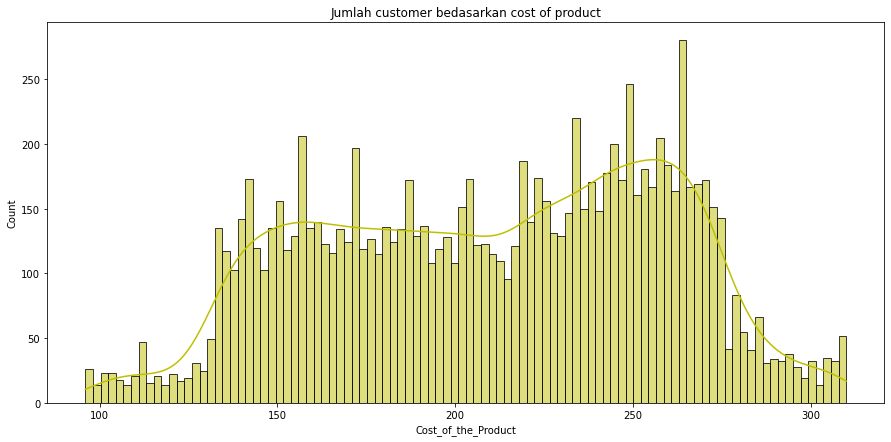

In [134]:
# Membuat plot distribusi untuk cost of product 

plt.figure(figsize = (15, 7))
ax = sns.histplot(df['Cost_of_the_Product'], bins = 100, color = 'y', label='Distribusi cost of product', kde=True)

plt.title('Jumlah customer bedasarkan cost of product')
plt.show()

- persebaran dari data cost of product mendekati distribusi uniform dengan persebaran dari nilai biaya barang yang  tersebar secara merata dari cost of product yang rendah hingga tinggi

In [135]:
# Membuat box plot untuk melihat relasi biaya barang dengan ketepatan waktu barang sampai kepada customer

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', 
       color = 'Reached.on.Time_Y.N', template = 'seaborn', title='Boxplot jumlah customer bedasarkan cost of product dan reach on time')

- Bedasarkan boxplot yang ditampilkan , Semakin tinggi cost of product semakin tinggi juga tingkat ketepatan waktu barang sampai kepada customer.
- Produk yang sampai tepat waktu berada pada range 174-254 dollar dan produk yang tidak sampai tepat waktu berada pada range 167-249 dollar. 

**Kita akan membuktikan bahwa terdapat perbedaan antara cost of product untuk kedua kategori reach on time**

In [136]:
#karena data cost of product tidak normal maka gunakan mann whitney
group1 = df[df['Reached.on.Time_Y.N'] == 1]['Cost_of_the_Product']
group2 = df[df['Reached.on.Time_Y.N'] == 0]['Cost_of_the_Product']

u_stat, p_val = stats.mannwhitneyu(group1, group2)

print("U-statistic:", u_stat)
print("p-value:", p_val)

# Menampilkan nilai H0 dan H1
if p_val < 0.05:
    print("Terdapat perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.")
else:
    print("Tidak ada perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu 'Reached.on.Time_Y.N' = 1 dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.")



U-statistic: 13325813.5
p-value: 4.881518157474724e-14
Terdapat perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.


- Bedasarkan nilai p-value = 4.881518157474724e-14 < 0.05, terdapat perbedaan yang signifikan antara barang yang sampai tepat pada waktunya dan tidak tepat waktu bedasarkan biaya produk 

### discount offered

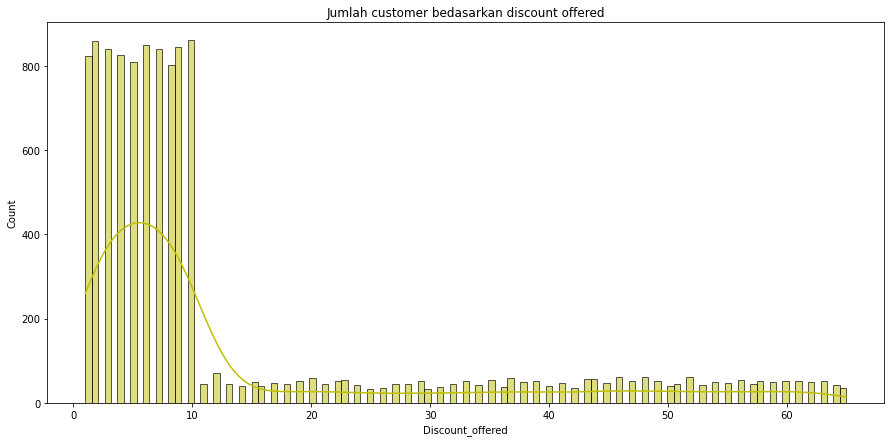

In [137]:
# Membuat plot distribusi untuk diskon yang diberikan kepada customer

plt.figure(figsize = (15, 7))
ax = sns.histplot(df['Discount_offered'], color = 'y', kde=True)

plt.title('Jumlah customer bedasarkan discount offered')
plt.show()

- Distribusi dari discount offered right skewed dengan range diskon terbanyak berada pada nilai dibawah 10 

In [138]:
data = pd.Series(df['Discount_offered'])

fig_diskon = px.histogram(data, nbins=100, color_discrete_sequence=['yellow'], title='Jumlah customer bedasarkan discount offered')
fig_diskon.show()

- Mayoritas data discount offered tersebar pada range nilai 1-10 dengan jumlah data untuk masing-masing range nilai diatas 800. Dapat disimpulkan bahwa hampir seluruh customer mendapatkan diskon yang rendah.   

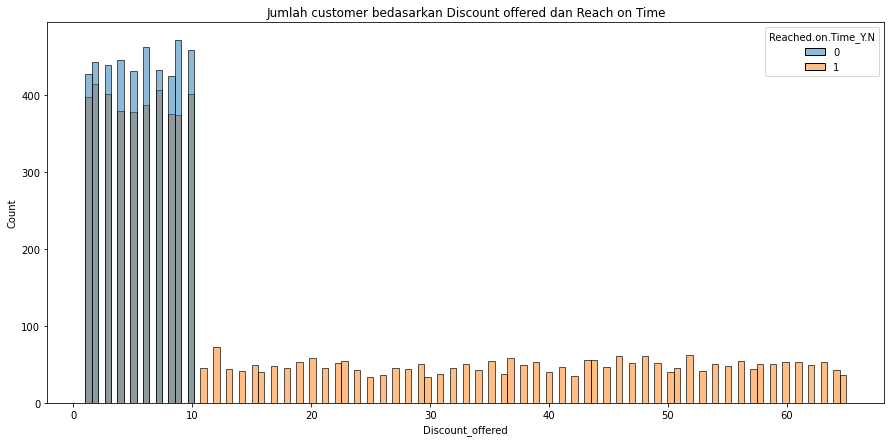

In [139]:
#Membuat hisplot untuk melihat pengaruh antara diskon dengan ketepatan waktu barang sampai kepada customer
plt.figure(figsize = (15, 7))
ax = sns.histplot(data=df, x='Discount_offered', color = 'y', hue='Reached.on.Time_Y.N', )

plt.title('Jumlah customer bedasarkan Discount offered dan Reach on Time')
plt.show()


- Bedasarkan grafik diatas , semakin rendah diskon (yaitu diskon range 1-10) maka persentase produk yang sampai tepat waktu kepada customer semakin tinggi. 

In [140]:
# Melihat relasi antara diskon dengan ketepatan waktu barang sampai kepada customer

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered', 
       color = 'Reached.on.Time_Y.N', template = 'seaborn', title='Boxplot untuk Reach on Time bedasarkan Discount Offered')

- Barang yang tidak sampai tepat waktu (Reach on Time = 1) memiliki range harga yang beragam pada range 5 hingga 32 dollar dan diskon maksimum sebesar 65 dollar dan diskon terendah 1 dollar. Sedangkan barang yang sampai tepat waktu (Reach on Time = 0) tidak memiliki range harga yang beragam hanya berada pada range 1 hingga 10. 

**kita akan membuktikan apakah terdapat perbedaan rata-rata discount offered dengan reach on time**

In [141]:
group1 = df[df['Reached.on.Time_Y.N'] == 1]['Cost_of_the_Product']
group2 = df[df['Reached.on.Time_Y.N'] == 0]['Cost_of_the_Product']

u_stat, p_val = stats.mannwhitneyu(group1, group2)

print("U-statistic:", u_stat)
print("p-value:", p_val)

# Menampilkan nilai H0 dan H1
if p_val < 0.05:
    print("Terdapat perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.")
else:
    print("Tidak ada perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu 'Reached.on.Time_Y.N' = 1 dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.")
   

U-statistic: 13325813.5
p-value: 4.881518157474724e-14
Terdapat perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.


- Bedasarkan test mannwhitney-u, dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara distribusi variabel 'Cost_of_the_Product' antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.

### weight in grams

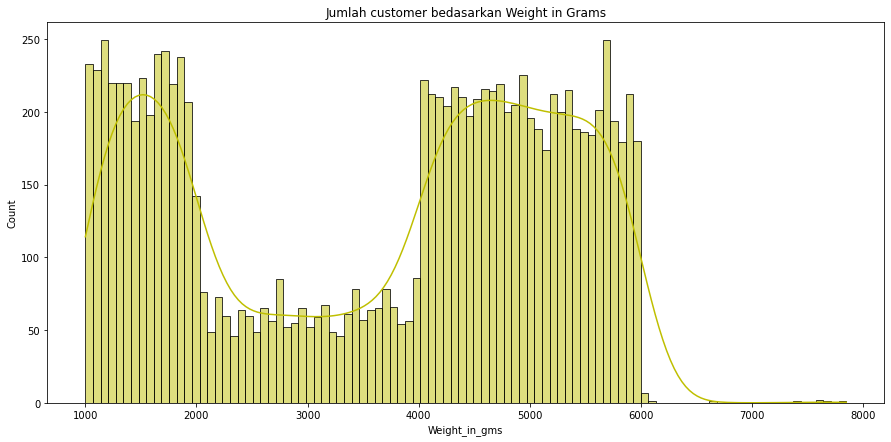

In [142]:
# Membuat histogram untuk berat barang

plt.figure(figsize = (15, 7))
ax = sns.histplot(df['Weight_in_gms'], bins = 100, color = 'y', kde=True)

plt.title('Jumlah customer bedasarkan Weight in Grams')
plt.show()

- Distribusi dari data weight umumnya tersebar pada range data dibawah 2000 dan data diantara 4000 dan 6000. Bentuk distribusi ini adalah distribusi bimodal.

In [143]:
data = pd.Series(df['Weight_in_gms'])

fig_weight = px.histogram(data, nbins=100, color_discrete_sequence=['yellow'], title='Jumlah Customer bedasarkan Weight in grams')
fig_weight.show()

- Jumlah customer untuk berat produk (weight in grams) dari 1000 hingga 1999 paling rendah 295 customer dan paling tinggi 356 customer, untuk customer yang berada pada range berat produk (weight in grams) 4000-5999 paling rendah berjumlah 266 customer dan paling tinggi 320 customer.

In [144]:
#mengetahui pengaruh berat barang terhadap ketepatan waktu barang sampai kepada customer 
px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', 
       color = 'Reached.on.Time_Y.N', template = 'ggplot2', title='Boxplot Jumlah customer bedasarkan Weight in grams dan Reach on Time')

- Produk yang sampai tepat waktu memiliki variasi berat umumnya nerada di range 4043 hingga 5337. sedangkan produk yang tidak sampai tepat waktu lebih beragam dari barang ringan hingga berat yang umumnya berada di range 1735 hingga 4696. 
- kita akan melakukan test **mann whitney u** untuk membuktikan apakah terdapat perbedaan rata-rata berat barang untuk kedua kategori reach on time.

In [145]:
group1 = df[df['Reached.on.Time_Y.N'] == 1]['Weight_in_gms']
group2 = df[df['Reached.on.Time_Y.N'] == 0]['Weight_in_gms']

u_stat, p_val = stats.mannwhitneyu(group1, group2)

print("U-statistic:", u_stat)
print("p-value:", p_val)

# Menampilkan nilai H0 dan H1
if p_val < 0.05:
    print("Terdapat perbedaan yang signifikan antara distribusi variabel berat barang('Weight_in_gms') antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.")
else:
    print("Tidak ada perbedaan yang signifikan antara distribusi variabel berat barang('Weight_in_gms') antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.")

U-statistic: 10000332.5
p-value: 3.398797458174781e-171
Terdapat perbedaan yang signifikan antara distribusi variabel berat barang('Weight_in_gms') antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.


- Bedasarkan nilai p-value yang sangat signifikan yaitu  3.398797458174781e-171, Maka dapat disimpulkan bahwa terdapat perbedaan yang signifikan antara distribusi variabel berat barang('Weight_in_gms') antara kelompok yang berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 1) dan kelompok yang tidak berhasil mencapai pengiriman tepat waktu ('Reached.on.Time_Y.N' = 0) di populasi.

*Akan dilakukan **peninjauan lebih lanjut** mengenai kolom weight yang dibagi bedasarkan tiga weight category yaitu light, medium dan heavy dengan visualisasi yang ditampilkan pada **Tableau**.*

Selanjutnya, kita juga ingin menelusuri lebih lanjut tentang salah satu feature pada data yaitu customer rating dan apakah ketepatan waktu yaitu reach on time maupun g fitur-fitur lainnya mempengaruhi rating yang customer berikan kepada perusahaan shipping ini. 

## Customer care calls, customer rating dan gender

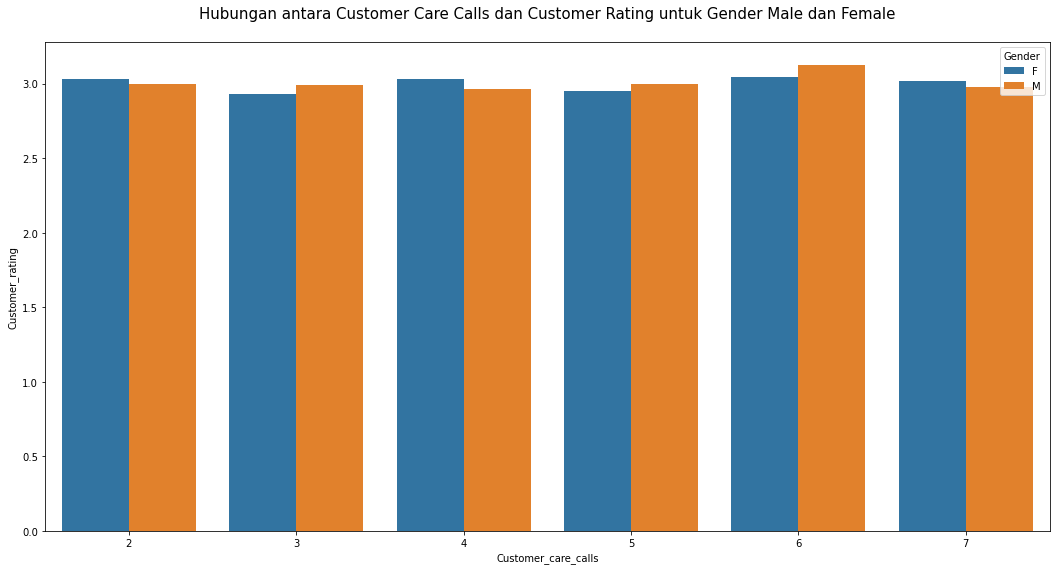

In [146]:
# Membuat barplot untuk mengetahui hubungan antara customer care calls, customer rating dan gender 

plt.figure(figsize = (18, 9))
sns.barplot(x = 'Customer_care_calls', y = 'Customer_rating', hue = 'Gender', data = df,ci = 0)
plt.title('Hubungan antara Customer Care Calls dan Customer Rating untuk Gender Male dan Female\n',
          fontsize = 15)
plt.show()

- Gender tidak mempengaruhi jumlah customer mengubungi call center dan rating yang diberikan.

kita akan melakukan uji spearman correlation untuk mengetahui apakah ada hubungan positif kuat dan negatif kuat antara kedua variabel

In [147]:
data_perempuan = df[df['Gender'] == 'F']
data_laki_laki = df[df['Gender'] == 'M']

korelasi_perempuan, _ = stats.spearmanr(data_perempuan['Customer_care_calls'], data_perempuan['Customer_rating'])
korelasi_laki_laki, _ = stats.spearmanr(data_laki_laki['Customer_care_calls'], data_laki_laki['Customer_rating'])

print("Korelasi Spearman untuk Perempuan:")
print("H0: Tidak ada korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls)dan customer rating untuk female.")
print("H1: Terdapat korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls) dan customer rating untuk female.")
print("Korelasi Spearman: ", korelasi_perempuan)

print("\nKorelasi Spearman untuk Laki-laki:")
print("H0: Tidak ada korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls)dan customer rating untuk male.")
print("H1: Terdapat korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls)dan customer rating untuk male.")
print("Korelasi Spearman: ", korelasi_laki_laki)

Korelasi Spearman untuk Perempuan:
H0: Tidak ada korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls)dan customer rating untuk female.
H1: Terdapat korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls) dan customer rating untuk female.
Korelasi Spearman:  0.010318790565704504

Korelasi Spearman untuk Laki-laki:
H0: Tidak ada korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls)dan customer rating untuk male.
H1: Terdapat korelasi signifikan antara jumlah customer menghubungi call center (Customer_care_calls)dan customer rating untuk male.
Korelasi Spearman:  0.013389502088242689


- Bedasarkan tes spearman correlation yang mendekati nol yaitu 0.010318790565704504 dan  0.013389502088242689, customer care calls untuk customer rating memiliki nilai spearman correlation yang sangat lemah. Maka dapat disimpulkan bahwa tidak ada korelasi signifikan antara customer care calls dan customer rating untuk gender female and male.

## Customer satisfaction vs Reach on Time 

Sebagai keterangan akan dibuat sebuah kolom baru bernama Satisfacton_level yang menunjukkan tingkat kepuasan customer atas layanan yang diberikan oleh perusahaan shipping 
- Nilai 1-3 : Unsatisfied
- Nilai 4-5 : Satisfied <br>
dan akan ditinjau apakah tingkat kepuasan customer dipengaruhi oleh ketepatan waktu barang sampai kepada customer

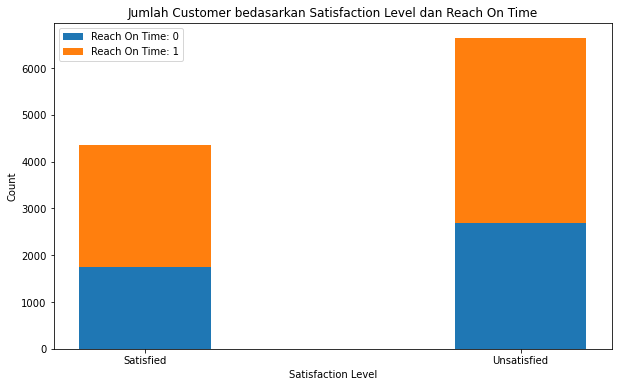

In [148]:
# Melakukan mapping untuk customer rating 
rating_mapping = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Unsatisfied', 4: 'Satisfied', 5: 'Satisfied'}
df['Satisfaction_Level'] = df['Customer_rating'].map(rating_mapping)


# Mengelompokkan data bedasarkan tingkat kepuasan dan reach on time 
grouped_data = df.groupby(['Satisfaction_Level', 'Reached.on.Time_Y.N']).size().unstack().reset_index()

# Memanggil data satisfaction level 
satisfaction_levels = grouped_data['Satisfaction_Level']
reach_on_time_0 = grouped_data[0].fillna(0).tolist()
reach_on_time_1 = grouped_data[1].fillna(0).tolist()

# Melakukan setting untuk positions dan width dari plot
positions = np.arange(len(satisfaction_levels))
width = 0.35

# Melakukan plotting
plt.figure(figsize=(10, 6))
bar1 = plt.bar(positions, reach_on_time_0, width, label='Reach On Time: 0')
bar2 = plt.bar(positions, reach_on_time_1, width, bottom=reach_on_time_0, label='Reach On Time: 1')

#Plotting ( set x dan y axis)
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Jumlah Customer bedasarkan Satisfaction Level dan Reach On Time')
plt.xticks(positions, satisfaction_levels)
plt.legend()

plt.show()

- Bedasarkan countplot diatas, sekalipun produk sampai tepat waktu customer tetap memberikan rating yang rendah (1-3).
Maka akan ditinjau lebih lanjut dengan mengecek proprosi produk yang sampai tepat waktu dan dilakukan uji statistik

In [149]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

rating_mapping = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Unsatisfied', 4: 'Satisfied', 5: 'Satisfied'}
df['Satisfaction_Level'] = df['Customer_rating'].map(rating_mapping)

grouped_data = df.groupby(['Satisfaction_Level', 'Reached.on.Time_Y.N']).size().unstack().reset_index()

satisfaction_levels = grouped_data['Satisfaction_Level']

# Calculate proportions
total_count = grouped_data[0].fillna(0) + grouped_data[1].fillna(0)
reach_on_time_0_proportion = grouped_data[0].fillna(0) / total_count
reach_on_time_1_proportion = grouped_data[1].fillna(0) / total_count

fig = go.Figure()

fig.add_trace(go.Bar(x=satisfaction_levels, y=reach_on_time_0_proportion, name='Reach On Time: 0'))
fig.add_trace(go.Bar(x=satisfaction_levels, y=reach_on_time_1_proportion, name='Reach On Time: 1'))

fig.update_layout(
    title='Proporsi Customer bedasarkan Satisfaction Level dan Reach On Time',
    xaxis=dict(title='Satisfaction Level'),
    yaxis=dict(title='Proportion'),
    barmode='stack'
)

# Add text annotations for proportions
annotations = []
for i in range(len(satisfaction_levels)):
    annotation = dict(
        x=satisfaction_levels[i],
        y=reach_on_time_0_proportion[i] + reach_on_time_1_proportion[i],
        text=f'{reach_on_time_0_proportion[i]*100:.2f}% / {reach_on_time_1_proportion[i]*100:.2f}%',
        showarrow=False,
        font=dict(size=10)
    )
    annotations.append(annotation)

fig.update_layout(annotations=annotations)

fig.show()

- Tidak terdapat perbedaan yang signifikan antara rating dengan kedua kategori reach on time dengan persentase barang yang sampai tepat waktu berada pada range 39% dan 40%. 
- Demikian juga untuk persentase barang yang telat berada pada range 59% dan 60%

Kita akan membuktikan analisa diatas dengan menggunakan test chi-square

In [150]:
# Melakukan mapping untuk customer rating
rating_mapping = {1: 'Unsatisfied', 2: 'Unsatisfied', 3: 'Unsatisfied', 4: 'Satisfied', 5: 'Satisfied'}
df['Satisfaction_Level'] = df['Customer_rating'].map(rating_mapping)

# Mengelompokkan data berdasarkan tingkat kepuasan dan reach on time
grouped_data = df.groupby(['Satisfaction_Level', 'Reached.on.Time_Y.N']).size().unstack().reset_index()

# Melakukan uji chi-square
observed_data = grouped_data.iloc[:, 1:].values
chi2, p_value, dof, expected = chi2_contingency(observed_data)

# Menampilkan hasil uji hipotesis
if p_value < 0.05:
    print("H0 ditolak: Terdapat perbedaan proporsi antara tingkat kepuasan dan mencapai tepat waktu.")
    print("H1 diterima: Terdapat perbedaan proporsi antara tingkat kepuasan dan mencapai tepat waktu.")
else:
    print("H0 diterima: Tidak ada perbedaan proporsi antara tingkat kepuasan dan mencapai tepat waktu.")
    print("H1 ditolak: Tidak ada perbedaan proporsi antara tingkat kepuasan dan mencapai tepat waktu.")
print("Nilai p-value:", p_value)

H0 diterima: Tidak ada perbedaan proporsi antara tingkat kepuasan dan mencapai tepat waktu.
H1 ditolak: Tidak ada perbedaan proporsi antara tingkat kepuasan dan mencapai tepat waktu.
Nilai p-value: 0.47619766655433093


## Loyalty Customer vs Satisfaction Level
Akan ditambahkan juga kolom Loyalty customer bedasarkan prior purchase. Dengan dua kategori:
- Prior purchase 2-4 : Disloyalty
- Prior Purchase > 4 : Loyalty

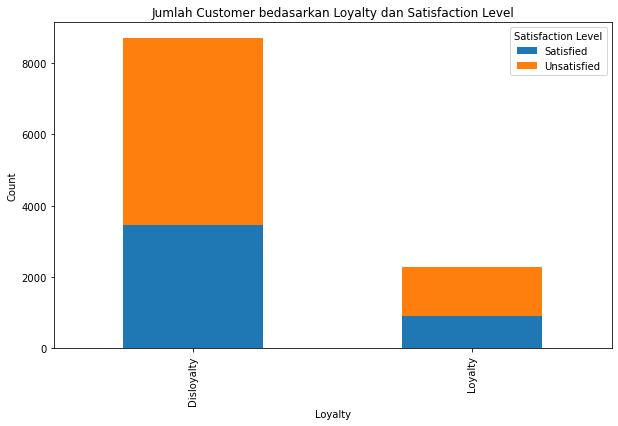

In [154]:

# Melakukan pengelompokkan loyalty customer bedasarkan jumlah prior purchases
df['Loyalty'] = pd.cut(df['Prior_purchases'], bins=[0, 4, float('inf')], labels=['Disloyalty', 'Loyalty'])

# Mengelompokkan data berdasarkan loyalty dan satisfaction level
grouped_data = df.groupby(['Loyalty', 'Satisfaction_Level']).size().unstack()

# Melakukan plotting
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Loyalty')
plt.ylabel('Count')
plt.title('Jumlah Customer bedasarkan Loyalty dan Satisfaction Level')
plt.legend(title='Satisfaction Level')

plt.show()

- Kebanyakan customer memiliki histori purchase dibawah 4 dan tergolong customer yang disloyal. Selain itu akan kita tinjau apakah terdapat perbedaan proporsi customer yang signifikan untuk kedua kategori dengan uji chi square

In [155]:
# Melakukan uji chi-square
chi2, p_value, dof, expected = chi2_contingency(grouped_data)

# Menampilkan hasil uji hipotesis
if p_value < 0.05:
    print("H0 ditolak: Terdapat perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas.")
    print("H1 diterima: Terdapat perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas.")
else:
    print("H0 diterima: Tidak ada perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas.")
    print("H1 ditolak: Tidak ada perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas.")
print("Nilai p-value:", p_value)

H0 diterima: Tidak ada perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas.
H1 ditolak: Tidak ada perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas.
Nilai p-value: 0.7275954568685317


- Bedasarkan uji chi-square dengan nilai p-value:  0.7275954568685317 > 0.05. Maka dapat disimpulkan bahwa tidak ada perbedaan proporsi antara tingkat kepuasan dan tingkat loyalitas. 

## Satisfaction Level vs Gender

In [161]:
# Mengelompokkan data berdasarkan Satisfaction Level dan Gender
grouped_data = df.groupby(['Satisfaction_Level', 'Gender']).size().unstack().reset_index()

# Membuat plot
fig = px.bar(grouped_data, x='Satisfaction_Level', y=['F', 'M'], title='Jumlah Customer bedasarkan Satisfaction Level dan Gender',
             labels={'value': 'Count', 'variable': 'Gender'}, barmode='group')

fig.update_layout(
    legend_title='Gender',
    xaxis_title='Satisfaction Level',
    yaxis_title='Count',
)

fig.show()

- Tidak terdapat perbedaan yang signifikan untuk rating antara gender male dan female. Jumlah male dan female yang memberikan rating tinggi ( 4-5) dan rating rendah (1-3) 
- sebanyak 2191 female customer dan 2169 male customer memberikan rating tinggi
- sebanyak 3354 female customer dan 3285 male customer memberikan rating rendah

In [163]:
# Melakukan uji chi-square
observed_data = grouped_data.iloc[:, 1:]
chi2, p_value, _, _ = chi2_contingency(observed_data)

# Menampilkan hasil uji hipotesis
if p_value < 0.05:
   print('Terdapat perbedaan proprosi antara Satisfaction level dan Gender')
else:
    print('Tidak ada perbedaan proporsi antara Satisfaction level dan Gender')

print("Nilai p-value:", p_value)


Tidak ada perbedaan proporsi antara Satisfaction level dan Gender
Nilai p-value: 0.7988540992753148


- Bedasarkan uji chi-square dengan nilai p-value = 0.7988540992753148 > 0.05. Maka  dapat disimpulkan bahwa tidak ada perbedaan proporsi antara Satisfaction level dan Gender

## Kesimpulan 

Perusahaan shipping ini memiliki persentase ketidaktepatan waktu produk sampai kepada customer yang lebih tinggi dibandibngkan dengan barang yang sampai tepat pada waktunya. Fitur-fitur pada data yang mempengaruhi ketepatan waktu produk sampai kepada customer adalah:
- Customer care calls : semakin sering customer menghubungi call center semakin tinggi persentase ketepatan waktu produk sampai kepada customer, ketika customer menghubungi call center sebanyak 6-7 kali proporsi produk yang sampai tepat waktu paling tinggi dibandingkan dengan customer care call lainnya (nilai 1-5) yaotu sebesar 48%. 
- Prior Purchases : Customer yang membeli produk sebanyak 5 kali (tergolong customer loyal karena nilai prior purchase > 4) memiliki persentase ketepatan waktu yang paling tinggi sebesar 50%. 
- Product importance : Tingkat kepentingan produk yang tinggi memiliki persentase jumlah barang yang sampai tepat waktu paling rendah dibandingkan dengan tingkat kepentingan produk lemah dan menengah (hanya 35% dari total produk dengan kepentingan tinggi yang sampai tepat waktu). 
- Discount offered : semakin rendah diskon (yaitu diskon yang berada pada range 0-10 dollar ) yang diberikan semakin tinggi persentase ketepatan waktu produk sampai kepada customer.
- Weight in grams : Produk yang tergolong medium weight (4043 - 5357 gram) memiliki persentase ketepatan waktu yang paling tinggi sebesar 24%. 
- Cost of product : Semakin tinggi cost of product maka semakin banyak barang yang sampai tepat waktu kepada customer. Produk yang sampai tepat waktu berada pada range 174-254 dollar dan produk yang tidak sampai tepat waktu berada pada range 167-249 dollar. 
<br> 
Fitur-fitur pada data yang tidak berpengaruh:
- Gender : Jumlah customer gender male dan female dengan produk yang tidak sampai tepat waktu memiliki persentase ketepatan waktu produk sampai sebesar 40%. 
- Mode of shipment : Ketiga metode pengiriman memiliki persentase produk yang tidak tepat waktu hampir sama (persentase barang yang sampai tepat waktu hanya 40%).
<BR>

Rating yang diberikan customer tidak dipengaruhi oleh ketepatan waktu produk sampai kepada customer (rating untuk customer yang tidak puas dan puas atas ketepatan waktu barang hanya sebesar 39% dan 40%) <br>
## Rekomendasi
-  Bedasarkan segi customer call, Perusahaan perlu memperbaiki layanan pengiriman jika customer telah menghubungi call center sebanyak 4 kali. Maka pengiriman ini harus diprioritaskan agar sampai tepat waktu. Sehingga tidak ada lagi customer yang mengubungi call center lebih dari 4 kali terkait dengan pengiriman. 
- Bedasarkan segi berat barang, Perusahaan dapat melakukan persuasi kepada customer untuk membeli produk lebih banyak khsusunya untuk customer yang membeli produk light weight agar dapat meningkatkan ketepatan waktu produk sampai kepada customer. 
- Bedasarkan segi diskon yang diberikan, perusahaan dapat meningkatkan jumlah armada dalam ketiga metode pengiriman yaitu ship, flight dan road agar persentase barang yang sampai tepat waktu kepada customer meningkat. Karena diskon yang tinggi ini biasanya di waktu-waktu tertentu seperti liburan atau akhir tahun yang memberikan diskon besar-besaran. 
- Bedasarkan segi kepentingan produk, Perusahaan shipping dapat meningkatkan komunikasi dan koordinasi antar divisi seperti divisi administrasi yang menginput order tidak boleh sampai lupa/terlewat dalam menginput order kepada customer dan segera menginfokan semua pesanan yang diinput pada hari itu kepada divisi logistik dan pengiriman. 